# Linked List

#### Reverse a linked list

In [2]:
from typing import Optional

# Definition for singly-linked list.
from IPython import display


class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def printList(self, head: Optional[ListNode]):
        while head:
            print(head.val)
            head = head.next

    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # need three pointers: head, prev, and tmp
        prev = None
        while head:
            # backup node after head
            tmp = head.next

            # point head in opposite direction
            head.next = prev

            # move prev forward
            prev = head

            # restore backup
            head = tmp

        # Set head back to prev since it will be None at the end
        head = prev
        return head

a = ListNode(1)
b = ListNode(2)
c = ListNode(3)
d = ListNode(4)
e = ListNode(5)

a.next = b
b.next = c
c.next = d
d.next = e

print("Original:\n")
sol = Solution()
sol.printList(a)
a = Solution().reverseList(a)
print("\nReversed:\n")
sol.printList(a)

Original:

1
2
3
4
5

Reversed:

5
4
3
2
1


[Reverse Linked List Verbose Steps](reverse_linked_list.pdf)

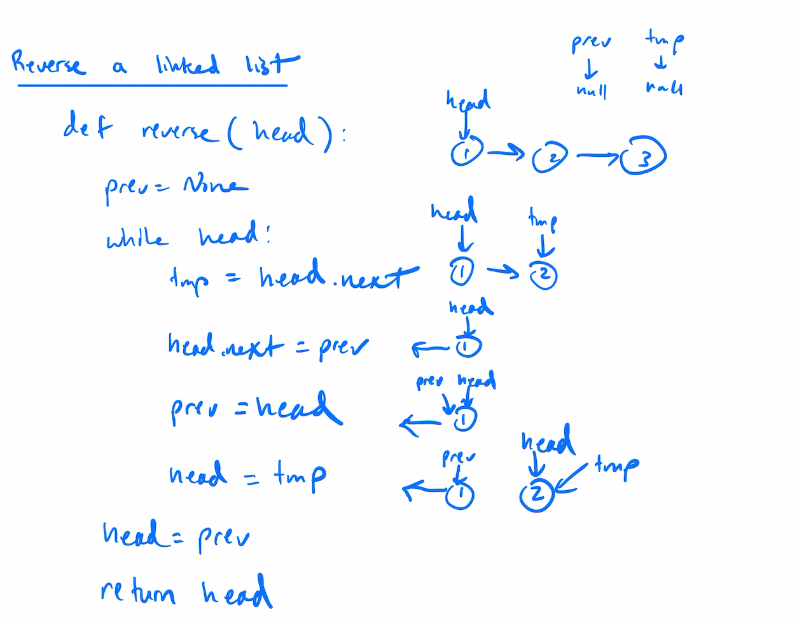

In [12]:
display.Image("media/reverse_linked_list_with_code.png")


### Insert element in sorted linked list while maintaining sorted order

In [70]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:

    def __init__(self):
        self.head = None

    def sorted_insert(self, data):
        """
        Time: O(n)
        Space: O(1)
        """

        if not self.head:
            new_node = Node(data)
            new_node.next = self.head
            self.head = new_node
            return

        _head = self.head
        _next = self.head.next
        while _head:
            if data > _head.data and data >= _next.data:
                _head = _head.next
                _next = _head.next
            else:
                # insert the new node
                tmp = _head.next
                new_node = Node(data)
                _head.next = new_node
                new_node.next = tmp
                return

    def delete(self, data):
        # find where head.data = data
        # point prev node to head.next
        _head = self.head
        _prev = None
        while _head:
            if data == _head.data:
                if _prev is None:
                    self.head = _head.next
                else:
                    _prev.next = _head.next
                return

            _prev = _head
            _head = _head.next
        print(f"Can't delete {data} as it doesn't exist")

    def push(self, data):
        """
        Inserts a new node at the beginning
        """
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node

    def display(self):
        temp = self.head
        while temp:
            print(temp.data, end=" ")
            temp = temp.next

In [71]:
linked_list = LinkedList()
for i in range(10)[::-1]:
    linked_list.push(i)
linked_list.display()

0 1 2 3 4 5 6 7 8 9 

In [72]:
linked_list.sorted_insert(2)
linked_list.sorted_insert(3)
linked_list.display()

0 1 2 2 3 3 4 5 6 7 8 9 

In [73]:
ll = LinkedList()
ll.sorted_insert(2)

In [74]:
ll.display()

2 

In [75]:
linked_list.display()

0 1 2 2 3 3 4 5 6 7 8 9 

In [76]:
linked_list.delete(2)
linked_list.display()

0 1 2 3 3 4 5 6 7 8 9 

In [77]:
linked_list.delete(9)
linked_list.display()

0 1 2 3 3 4 5 6 7 8 

In [78]:
linked_list.delete(9)
linked_list.display()

Can't delete 9 as it doesn't exist
0 1 2 3 3 4 5 6 7 8 

#### Compare two strings represented as linked lists
Given two strings, represented as linked lists (every character is a node in a linked list). Write a function compare() that works similar to strcmp(), i.e., it returns 0 if both strings are the same, 1 if the first linked list is lexicographically greater, and -1 if the second string is lexicographically greater.

Note: lexicographically means the unicode value of each character is compared
```
Examples:


Input: list1 = g->e->e->k->s->a
       list2 = g->e->e->k->s->b
Output: -1 because list2 is lexicographically greater than list1

Input: list1 = g->e->e->k->s->a
       list2 = g->e->e->k->s
Output: 1 because list1 is lexicographically greater than list2

Input: list1 = g->e->e->k->s
       list2 = g->e->e->k->s
Output: 0 because list1 and list2 are the same
```

In [100]:
class Node:
    def __init__(self, key):
        self.c: str = key
        self.next = None

def compare(head1: Node, head2: Node) -> int:
    """
    Assumes each node's data is a single character in both LinkedLists
    returns 1 if list1 is lexicographically greater than other
    returns -1 if list2 is lexicographically greater than list1
    returns 0 if list1 is the same as list2
    """


    # move forward until either list ends or the character 'c' is different
    while head1 and head2 and head1.c == head2.c:
        head1 = head1.next
        head2 = head2.next

    # if both lists are not empty, the characters are mismatched
    if head1 and head2:
        # we can assume head1.c != head2.c here
        return 1 if head1.c > head2.c else -1

    # if lengths are mismatched,
    if head1 and not head2:
        return 1
    if not head1 and head2:
        return -1

    # both lists are empty and the characters are not mismatched.
    return 0

head1 = Node("a")
head1.next = Node("b")
head1.next.next = Node("c")

head2 = Node("a")
head2.next = Node("b")
head2.next.next = Node("c")
head2.next.next.next = Node("d")

def test(head1, head2, result):
    res = compare(head1, head2)
    if res == 1:
        print("List 1 is greater.", end=" ")
    elif res == -1:
        print("List 2 is greater.", end=" ")
    else:
        print("List1 == List2.", end=" ")
    assert res == result, "Failure"
    print("Pass")
test(head1, head2, -1)
head2.next.next.next = None
test(head1, head2, 0)
head1.next.next.c = "d"
test(head1, head2, 1)

List 2 is greater. Pass
List1 == List2. Pass
List 1 is greater. Pass


#### Check if linked list has a cycle in it or not

[https://leetcode.com/problems/linked-list-cycle/](https://leetcode.com/problems/linked-list-cycle/)

In [32]:
from typing import Optional
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        visited = set()

        while head:
            visited.add(head)
            head = head.next
            if head in visited:
                return True
        return False

neg_four = ListNode(-4)
zero = ListNode(0)
two = ListNode(2)
three = ListNode(3)
three.next = two
two.next = zero
zero.next = neg_four
neg_four.next = two

result = Solution().hasCycle(three)
print(result)
assert result == True

True


#### Add two numbers represented by linked lists

[https://leetcode.com/problems/add-two-numbers/](https://leetcode.com/problems/add-two-numbers/)

In [115]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    def display(self):
        result = []
        head = self
        while head:
            # print(head.val, end=" ")
            result.append(head.val)
            head = head.next
        # because of the nature of this problem,
        # the numbers are listed in reverse (it is actually helpful
        # from an implementation perspective in Solution().addTwoNumbers(...)
        print("".join(str(each) for each in reversed(result)))


class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        # Time: O(n)
        # Space: O(1)
        # Assumptions:
        # lists may not be equal in length
        # no leading zeros

        # Algorithm:
        # traverse to end node keeping track of position from the leftmost number
        # can only add two nodes if their positions are the same
        # keep track of carry after each division, add it to next addition
        # position is different for each linked list
        #

        # Simple example:
        # 2 4 3
        # 5 6 4
        #     ^

        #     7 ,carry = 0,
        #   0   ,carry = 1  (take ones value of addition result only), add 1 to carry, position = 1
        # 8     ,carry = 0,

        # 2 5 3 4
        #   5 6 4

        #       8,carry = 0
        #     9  ,carry = 0
        #   0    ,carry = 1
        # 3      ,carry = 0 stop.

                # if either l1 or l2 is empty, whatever the other list is will be the answer,
        # even if it's also empty
        # if either l1 or l2 is empty, whatever the other list is will be the answer,
        # even if it's also empty
        if not l1:
            return l2
        if not l2:
            return l1

        result = None
        prev = None
        curr = None
        carry = 0
        while l1 or l2:
            if l1 and l2:
                # add val of both nodes together, add carry as well
                new_node = ListNode((carry + l1.val + l2.val) % 10)
                carry = (carry + l1.val + l2.val) // 10
                l1 = l1.next
                l2 = l2.next
            elif l1 and not l2:
                # only take into consideration the carry and l1's value since l2 is empty
                new_node = ListNode((carry + l1.val) % 10)
                carry = (carry + l1.val) // 10
                l1 = l1.next
            elif not l1 and l2:
                # only take into consideration the carry and l2's value since l1 is empty
                new_node = ListNode((carry + l2.val) % 10)
                carry = (carry + l2.val) // 10
                l2 = l2.next
            # curr points to new node
            # append curr to the result
            curr = new_node
            # if result is empty, curr will be the head. Set the result to the head
            if not result:
                # can't set result = curr because they will point to the same object
                # and the curr will be updated which will also update result
                # adding curr to a list then extracting it out is a workaround
                # This preserves O(1) space complexity
                # With O(n) space complexity, could add all elements to a list
                # then pick out the first one, or any other element in the list
                # kind of defeats the purpose of using linked lists though...
                result = [curr][0]
            # if prev is not None, set it's next value to the current node
            if prev:
                prev.next = curr
            # move prev and curr forward one node each
            prev = curr
            curr = curr.next

        # in case we have a carry at the end,
        # create a new node with the carry's value
        # carry will always be < 10
        if carry > 0:
            new_node = ListNode(carry)
            prev.next = new_node

        return result

l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)

l2 = ListNode(1)
l2.next = ListNode(2)
l2.next.next = ListNode(3)
l2.next.next.next = ListNode(4)

print("321 + 321 = ", end = " ")
Solution().addTwoNumbers(l1, l1).display()

print("4321 + 321 = ", end = " ")
Solution().addTwoNumbers(l1, l2).display()


321 + 321 =  642
4321 + 321 =  4642


Note from [https://stackoverflow.com/questions/40425554/python-shallow-copy-and-deep-copy-in-using-append-method](https://stackoverflow.com/questions/40425554/python-shallow-copy-and-deep-copy-in-using-append-method)

>  there's no copy whatsoever involved in an append operation. So you'll have to explicitly take care of this yourself, e.g. by replacing

`basis.append(state)`
with
`basis.append(state[:])`
The slicing operation with : creates a copy of state.


### 2095. Delete the Middle Node of a Linked List
[https://leetcode.com/problems/delete-the-middle-node-of-a-linked-list/](https://leetcode.com/problems/delete-the-middle-node-of-a-linked-list/)
You are given the head of a linked list. Delete the middle node, and return the head of the modified linked list.

The middle node of a linked list of size n is the ⌊n / 2⌋th node from the start using 0-based indexing, where ⌊x⌋ denotes the largest integer less than or equal to x.

In [3]:
from typing import Optional
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def deleteMiddle(self, head: Optional[ListNode]) -> Optional[ListNode]:

        if not head.next:
            return None

        nodes = []
        while head:
            nodes.append(head)
            head = head.next

        prev_node = nodes[len(nodes) // 2 - 1]
        middle_node = nodes[len(nodes) // 2]
        if len(nodes) // 2 + 1 < len(nodes):
            next_node = nodes[len(nodes) // 2 + 1]
        else:
            next_node = None
        prev_node.next = next_node
        return nodes[0]